In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
dataset=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=dataset.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_images.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


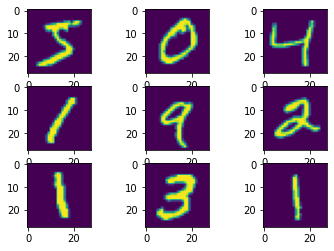

In [4]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_images[i])

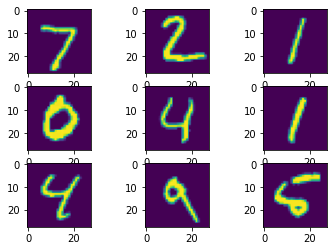

In [5]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(test_images[i])

In [7]:
train_images=train_images/255.0
test_images=test_images/250.0
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
model=Sequential([Flatten(input_shape=(28,28)),Dense(128,activation='relu'),
                                 Dense(10,activation=tf.nn.softmax)])

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [18]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels), callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.2601 - accuracy: 0.9257 - val_loss: 0.1350 - val_accuracy: 0.9619
Epoch 2/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1151 - accuracy: 0.9661 - val_loss: 0.1040 - val_accuracy: 0.9688
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0786 - accuracy: 0.9768 - val_loss: 0.0861 - val_accuracy: 0.9750
Epoch 4/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0715 - val_accuracy: 0.9789
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0816 - val_accuracy: 0.9755
Epoch 7/10
60000/60000 [==============================] - 8s 1

In [19]:
print(model.evaluate(test_images,test_labels))

10000/10000 [==============================] - 1s 61us/step
[0.0749160678624161, 0.9789999723434448]


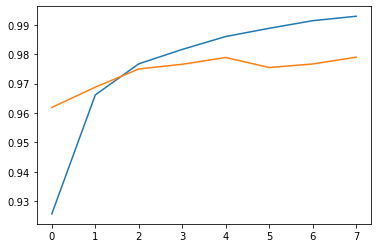

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show() 

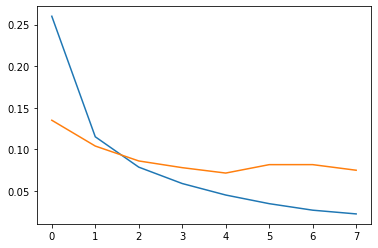

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

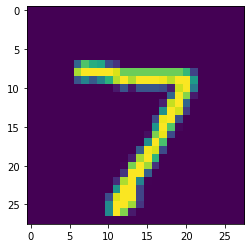

In [23]:
plt.imshow(test_images[0])